<a href="https://colab.research.google.com/github/DivyaPokkunuri/Machine-Learning/blob/main/Heart_Disease_random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Report 

### NAME: DIVYA POKKUNURI



## TOPIC : HEART DISEASE PREDICTION USING RANDOM FORESTS

**PROBLEM STATEMENT:** 

I Focused on finding the top influencers in heart predictions using correlation matrix and Python visulaisations. Further ML was applied using Random forests, on the proposed system. The highest accuracy obtained was 85.5% with 0.3 threshold. 

**Abstract:**


Data mining plays a very important role in Health- care industry. Be it in predicting diseases based on symptoms or predicting the stage / level of severity of any disease, data mining has proved to be very helpful. Healthcare industries collect huge amounts of data and thus, the use of machine learning saves time and guarantees performance. In this project I have analyzed the various data mining techniques which can be used in the healthcare industry for heart disease prediction and proposed a system that uses 8 medical attributes such as sex, thallium test results, chest pain type, exang, age, etc. for the same. The accuracy and key influencers for the proposed system have been discussed too. The most preferred supervised learning techniques is random forest and the analysis for the same has been done. 

**Heart Disease**

Heart disease is one of the leading causes of anguish and loss of life and due to this very reason predicting cardiovascular diseases is crucial in the section of clinical data analysis for healthcare sector. In our study we implemented Decision Tree, Naive Bayes, and Random Forest. Factors causing heart disease are:
•	Smoking
•	High Cholesterol in blood
•	Blood Vessel inflammation
•	High Blood pressure
•	High amount of some type of fats in body 

Attribute Description of Database used:


AGE: age of the person in years
SEX: This is a binary attribute suggesting the gender of the person. State 1 indicates the person is male, and 0 indicates person is female.
CP (chest pain): nothing but discomfort provoked by various reasons. It takes 4 values: asymptomatic, typical angina, non-angina, and atypical angina, respectively.
THALACH: This is the maximum heart rate recorded in thallium stress test. This attribute is very intuitive as it tells how heart rate of a person suffering from heart disease changes with respect to a person who is heart disease free.
EXANG: specifies Exercise induced angina. This is the discomfort encountered after exercise or emotional stress. Angina is generally caused when heart does not get adequate blood through the arteries to pump. This can be common after exercise and can be relieved with rest. This is a binary attribute as well where state 1 indicates the person encounters angina during or after exercise; 0 indicates absence of any such discomfort during exercises.
THAL: This is the result of Thallium stress test. Thallium stress test’s objective is to know how well blood flows into our heart. Based on its value, it can be classified as normal (value=3), fixed defect (value=6), reversible defect (value=7), etc.
OLDSPEAK: This attribute has a numeric value based on the ST depression found on an electrocardiogram which is generated by exercise corresponding to rest.
CA: This attribute is the number of major vessels that are colored by fluoroscopy. The values 0 to 3 indicate the vessels.

Attributes removed from the Cleveland Database:
TRESTBPS: resting blood pressure. It is the force with which the blood is hitting our artery walls. If resting blood pressure is high, several heart related issues can arise.
CHOL: serum cholesterol in mg/dl
FBS: Fasting blood sugar. It is a binary attribute as well. State 1 indicates the fasting blood sugar value is less than 120 mg/dl or greater than 120 mg/dl. If your fasting blood sugar   is less than 100 mg/dl and greater than 70 mg/dl, then it can be said normal.
RESTECG: resting electrocardiographic results (normal, ST-T wave abnormality, or left ventricular hypertrophy)
SLOPE: The ST/heart rate slope is the relative shift in ST segments to exercise induced increments in the heart rate. Slope consists of three values where 1 indicates upsloping, 2 indicates flat, and 3 indicates down sloping.



**Random Forest**

The Healthcare industry focuses on performance as well as precision and in such cases, decision trees and random forest prove to be of great help. You go for decision trees when   you want to focus more on data interpretation or performance while random forests come with precision too. Random forests follow Ensemble learning. You take multiple machines learning algorithms and put them together to create one bigger machine learning algorithm. Now this machine learning algorithm, the final one, is leveraging many different other machine learning algorithms making it highly efficient. The Random Forest algorithm is one of the most popular and powerful supervised machines learning algorithm which can perform both classification and regression tasks. This algorithm makes the forest with a various decision trees. The more trees in a forest the more vigorous the forecast, and in this manner higher the precision. In random forest we develop various trees instead of a single tree. To classify a new object based on the attribute, each individual tree gives a class prediction. The forest chooses the classification that has the most votes of all the trees in the forest, and that becomes the model’s prediction. In the case of regression, it takes the average of the output of the different trees.

# Random Forest Classification

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt                                                                    
import pandas as pd                                                   
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('heart.csv')

### DESCRIPTION

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No missing values or outliers. Moving forward with analysis. 

## **Analysis of Attributes of DATASET**

In [ ]:
data_copy=dataset.copy()

In [ ]:
visuals={"sex":{1:"Male",0:"Female"},
         "cp":{0:"typical angina",1: "atypical angina" ,2: "non-anginal pain" ,3: "asymptomatic"},
         "fbs":{0:"<=120",1:">120"},
         "exang":{0:"no",1:"yes"},
         "restecg" :{0:"normal" ,1:"ST-T wave abnormality",2:"probable or definite left ventricular hypertrophy"},
         "target" :{ 0:"No Heart Disease",1 : "heart-disease"},
         "slope" :{2 : "upsloping",1 :"flat",0 : "downsloping"},
         "thal" :{ 1 : "fixed defect",0 : "normal",2 : "reversable defect",3:"NA"}
         
}
data_copy.replace(visuals,inplace=True)

**Correlation in DATA**

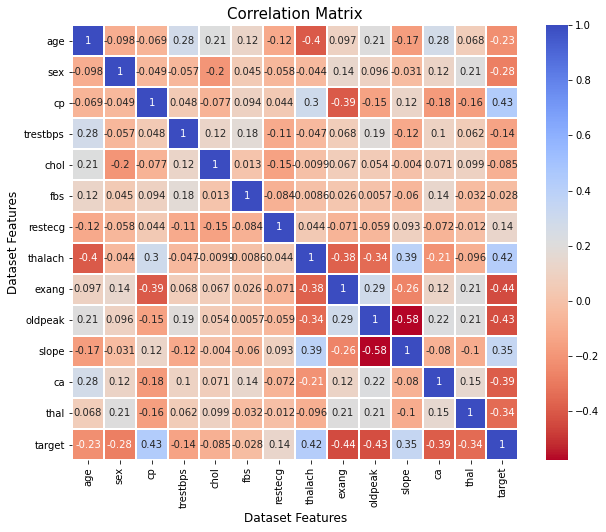

In [ ]:
corr=dataset.corr(method='pearson')


figure, ax= plt.subplots(figsize = ( 10 , 8 )) 
sns.heatmap(corr, cmap='coolwarm_r', linewidths=1, annot=True)

ax.set_xlabel( "Dataset Features" , size = 12 )  
ax.set_ylabel( "Dataset Features" , size = 12 ) 
ax.set_title( "Correlation Matrix" , size = 15)
plt.show() 

 **Slope and Oldpeak are two independent features with high correlation. This causes redundancy and hence one of them can be removed for better accuracy.**

**Target V/S Chest pain type**

In [ ]:
df_plot = data_copy.groupby(['cp', 'target']).size().reset_index().pivot(columns='cp', index='target', values=0) 
df_plot

cp,asymptomatic,atypical angina,non-anginal pain,typical angina
target,,,,
No Heart Disease,7,9,18,104
heart-disease,16,41,69,39


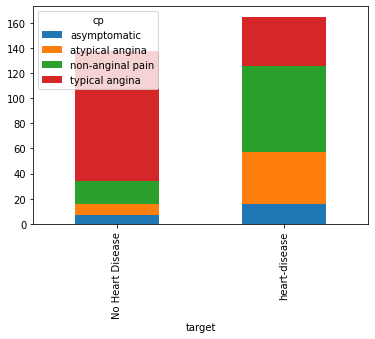

In [ ]:
df_plot.plot(kind='bar', stacked=True)

**Thalium test result VS Target**

In [ ]:
visuals={
         "target" :{ 0:"No Heart Disease",1 : "heart-disease"}      
}
dataset.replace(visuals,inplace=True)

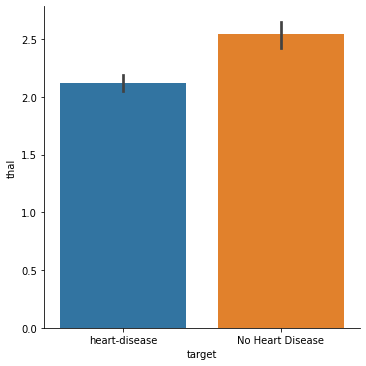

In [ ]:
sns.catplot(y="thal", x="target", kind="bar", data=dataset)

**Age VS Target**

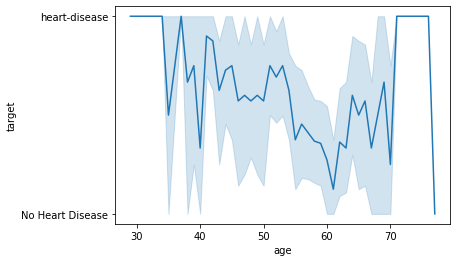

In [ ]:
sns.lineplot(data= dataset ,x='age', y='target')

In [ ]:
visuals={
         "target" :{"No Heart Disease" : 0, "heart-disease": 1}      
}
dataset.replace(visuals,inplace=True)

Pairplot of attributes which may not be important 

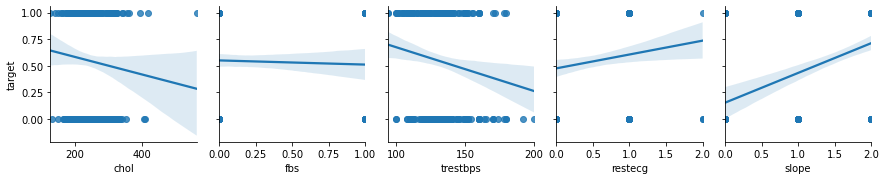

In [ ]:
sns.pairplot(data= dataset,x_vars=['chol', 'fbs' , 'trestbps', 'restecg', 'slope'], y_vars=['target'] , kind='reg')

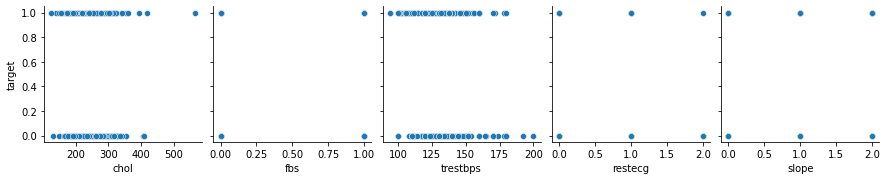

In [ ]:
sns.pairplot(data= dataset,x_vars=['chol', 'fbs' , 'trestbps', 'restecg', 'slope'], y_vars=['target'] , kind='scatter')

Removing the following attributes

In [ ]:
dataset.drop(columns={'chol', 'fbs' , 'trestbps', 'restecg', 'slope'}, axis=1, inplace=True)
dataset

,age,sex,cp,thalach,exang,oldpeak,ca,thal,target
0,63,1,3,150,0,2.3,0,1,1
1,37,1,2,187,0,3.5,0,2,1
2,41,0,1,172,0,1.4,0,2,1
3,56,1,1,178,0,0.8,0,2,1
4,57,0,0,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,0,3,0
299,45,1,3,132,0,1.2,0,3,0
300,68,1,0,141,0,3.4,2,3,0
301,57,1,0,115,1,1.2,1,3,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[58.   1.   2.  ...  3.2  2.   3. ]
 [52.   1.   0.  ...  0.   1.   2. ]
 [54.   1.   2.  ...  1.6  0.   3. ]
 ...
 [56.   1.   3.  ...  1.9  0.   3. ]
 [47.   1.   2.  ...  0.   0.   2. ]
 [58.   1.   1.  ...  1.8  0.   2. ]]


In [ ]:
print(y_train)

[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0]


In [ ]:
print(X_test)

[[7.00e+01 1.00e+00 0.00e+00 1.25e+02 1.00e+00 2.60e+00 0.00e+00 3.00e+00]
 [6.40e+01 1.00e+00 3.00e+00 1.55e+02 0.00e+00 6.00e-01 0.00e+00 3.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.59e+02 0.00e+00 2.00e-01 0.00e+00 3.00e+00]
 [6.00e+01 1.00e+00 0.00e+00 1.41e+02 1.00e+00 2.80e+00 1.00e+00 3.00e+00]
 [6.20e+01 1.00e+00 2.00e+00 1.46e+02 0.00e+00 1.80e+00 3.00e+00 3.00e+00]
 [4.80e+01 1.00e+00 0.00e+00 1.66e+02 0.00e+00 5.00e-01 0.00e+00 3.00e+00]
 [4.00e+01 1.00e+00 0.00e+00 1.14e+02 1.00e+00 2.00e+00 0.00e+00 3.00e+00]
 [6.30e+01 1.00e+00 0.00e+00 1.47e+02 0.00e+00 1.40e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.33e+02 1.00e+00 4.00e+00 2.00e+00 3.00e+00]
 [6.30e+01 1.00e+00 0.00e+00 1.32e+02 1.00e+00 1.80e+00 3.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.73e+02 0.00e+00 2.00e-01 1.00e+00 3.00e+00]
 [4.90e+01 0.00e+00 0.00e+00 1.63e+02 0.00e+00 0.00e+00 0.00e+00 2.00e+00]
 [6.50e+01 1.00e+00 0.00e+00 1.27e+02 0.00e+00 2.80e+00 1.00e+00 3.00e+00]
 [4.90e+01 1.00e+00 1.00e

In [ ]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.35256528  0.70243936  0.9870291  ...  1.72483977  1.22723311
   1.12135917]
 [-0.31068598  0.70243936 -0.91982712 ... -0.92348745  0.25993479
  -0.45968761]
 [-0.08960223  0.70243936  0.9870291  ...  0.40067616 -0.70736353
   1.12135917]
 ...
 [ 0.13148153  0.70243936  1.94045721 ...  0.64895684 -0.70736353
   1.12135917]
 [-0.86339537  0.70243936  0.9870291  ... -0.92348745 -0.70736353
  -0.45968761]
 [ 0.35256528  0.70243936  0.03360099 ...  0.56619661 -0.70736353
  -0.45968761]]


In [ ]:
print(X_test)

[[ 1.67906782  0.70243936 -0.91982712 -1.04934923  1.38212026  1.22827842
  -0.70736353  1.12135917]
 [ 1.01581655  0.70243936  1.94045721  0.238927   -0.72352604 -0.4269261
  -0.70736353  1.12135917]
 [ 0.46310716  0.70243936  1.94045721  0.41069717 -0.72352604 -0.757967
  -0.70736353  1.12135917]
 [ 0.57364904  0.70243936 -0.91982712 -0.36226857  1.38212026  1.39379887
   0.25993479  1.12135917]
 [ 0.79473279  0.70243936  0.9870291  -0.14755587 -0.72352604  0.56619661
   2.19453143  1.12135917]
 [-0.75285349  0.70243936 -0.91982712  0.71129496 -0.72352604 -0.50968632
  -0.70736353  1.12135917]
 [-1.63718851  0.70243936 -0.91982712 -1.52171719  1.38212026  0.73171706
  -0.70736353  1.12135917]
 [ 0.90527467  0.70243936 -0.91982712 -0.10461333 -0.72352604  0.23515571
   0.25993479  1.12135917]
 [ 0.13148153 -1.42361043 -0.91982712 -0.7058089   1.38212026  2.38692158
   1.22723311  1.12135917]
 [ 0.90527467  0.70243936 -0.91982712 -0.74875145  1.38212026  0.56619661
   2.19453143  1.121

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[27  6]
 [ 5 38]]


0.8552631578947368

In [ ]:
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,27,6
1,5,38


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.86      0.88      0.87        43

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



As false negatives are 5 (which can be dangerous many a times in healthcare industry), we further try with other thresholds and plot ROC.

**EVALUATION WITH DIFFERENT THRESHOLDS**

In [ ]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
#Threshold 0.2,o.3, 0.4, 0.6
y_pred_thr3=np.where(classifier.predict_proba(X_test)[:,1]>0.3,1,0)
y_pred_thr2=np.where(classifier.predict_proba(X_test)[:,1]>0.2,1,0)
y_pred_thr4=np.where(classifier.predict_proba(X_test)[:,1]>0.4,1,0)
y_pred_thr6=np.where(classifier.predict_proba(X_test)[:,1]>0.6,1,0)

In [ ]:
#CM-------0.3 threshold--------best accuracy and false negatives
cm = confusion_matrix(y_test, y_pred_thr3)
print(cm)
accuracy_score(y_test, y_pred_thr3)

[[23 10]
 [ 2 41]]


0.8421052631578947

In [ ]:
#CM---------0.2 threshold
cm = confusion_matrix(y_test, y_pred_thr2)
print(cm)
accuracy_score(y_test, y_pred_thr2)

[[21 12]
 [ 2 41]]


0.8157894736842105

In [ ]:
#CM-------0.4 threshold
cm = confusion_matrix(y_test, y_pred_thr4)
print(cm)
accuracy_score(y_test, y_pred_thr4)

[[24  9]
 [ 3 40]]


0.8421052631578947

As seen, with threshold o.3, we get less number of false negatives and good accuracy. Plotting ROC for further evaluation of model. 

**Plotting ROC Curves**

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

In [ ]:
print('roc_auc_score for RandomForests: ', roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1]))

roc_auc_score for RandomForests:  0.9207188160676532


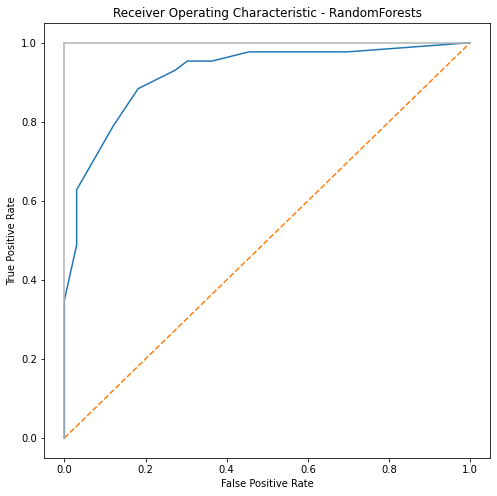

In [ ]:
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic - RandomForests')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

RESULT : 

Accuracy score for the model occurs to be 0.92, which proves it is a very good model.